<a href="https://colab.research.google.com/github/iamNirmeshGupta/Google-Play-Store-App-Rating-Prediction/blob/main/PlayStore_App_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Loading the Dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/alma better/Playstore App Rating Prediction/googleplaystore.csv")

In [ ]:
# Basic Inspection
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [ ]:
# Basic Inspection
df.shape

(10841, 13)

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


There are null values in few of the columns and also the data type of some of the columns is not approprate. Let's dive deep into the dataset and do some data cleaning.

#Data Cleaning

In [ ]:
# Checking null count
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
# Checking duplicate count
df.duplicated().sum()

483

In [ ]:
# Dropping duplicate records
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(10358, 13)

##Rating Column

In [ ]:
df[df['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [ ]:
# Imputing the null values present in Rating column with its mean
df['Rating'].fillna(df['Rating'].mean(), inplace = True)

In [ ]:
df[df['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
# Dropping other records with null values
df.dropna(inplace=True)

In [ ]:
df.isna().sum().sum()

0

##Size Column

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
df['Size'].value_counts()

Varies with device    1525
11M                    187
12M                    186
13M                    186
14M                    181
15M                    174
17M                    155
26M                    145
16M                    143
19M                    135
10M                    133
25M                    131
20M                    131
21M                    130
24M                    129
18M                    124
23M                    109
22M                    108
29M                     95
27M                     94
28M                     92
30M                     84
33M                     78
3.3M                    76
37M                     72
31M                     69
35M                     68
2.5M                    68
2.3M                    68
2.9M                    67
2.8M                    65
3.4M                    64
3.7M                    63
32M                     62
3.0M                    61
3.9M                    61
3.8M                    60
4

We need to replace units from the Size column.

In [ ]:
# Removing redundant units present and replacing with empty string
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M','') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k',''))/1000 if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device','NaN') if 'Varies with device' in str(x) else x)


In [ ]:
# Changing datatype of Size column to 'Float'
df['Size'] = df['Size'].apply(lambda x: float(x))

In [ ]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


##Installs Column

In [ ]:
# Replacing '+' and ',' signs with empty string
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else x)

In [ ]:
# Changing datatype to Integer
df['Installs'] = df['Installs'].apply(lambda x: int(x))

##Reviews Column

In [ ]:
# Changing datatype to Integer
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

In [ ]:
# Dropping records where number of Installs are less than reviews as these imply False reviews
df.drop(df[df['Installs']<df['Reviews']].index, inplace=True)

##Price Column

In [ ]:
# Replacing '$' sign from Prices
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$','') if '$' in x else x)

In [ ]:
# Changing datatype to float
df["Price"] = df['Price'].apply(lambda x: float(x))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10335 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10335 non-null  object 
 1   Category        10335 non-null  object 
 2   Rating          10335 non-null  float64
 3   Reviews         10335 non-null  int64  
 4   Size            8811 non-null   float64
 5   Installs        10335 non-null  int64  
 6   Type            10335 non-null  object 
 7   Price           10335 non-null  float64
 8   Content Rating  10335 non-null  object 
 9   Genres          10335 non-null  object 
 10  Last Updated    10335 non-null  object 
 11  Current Ver     10335 non-null  object 
 12  Android Ver     10335 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


##Outlier Detection

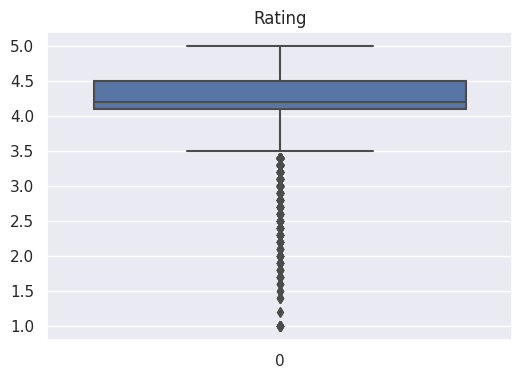

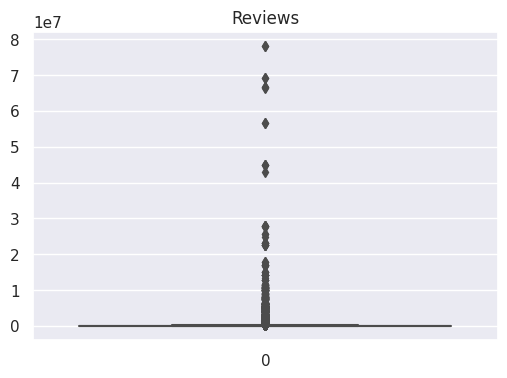

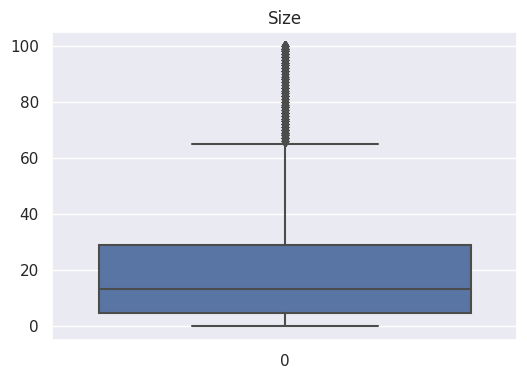

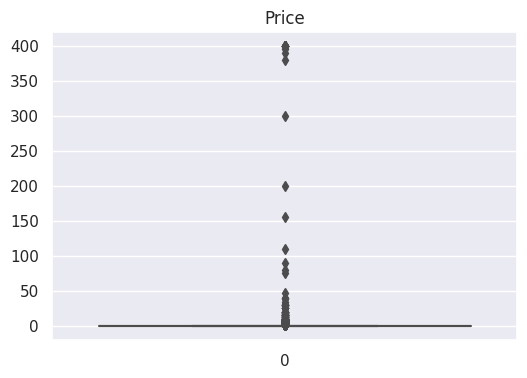

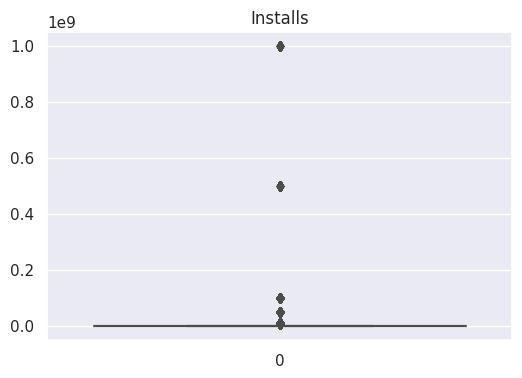

In [ ]:
num_cols = ['Rating','Reviews','Size','Price','Installs']

sns.set(rc={'figure.figsize':(6,4)})
for i in num_cols:
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()


There are many outliers present in 'Price', 'Reviews', 'Installs' columns.

##Outlier Treatment

In [ ]:
# Capping the columns with appropriate value and removing outliers
df.drop(df[df['Price']>200].index, inplace=True)
df.drop(df[df['Reviews']>2000000].index, inplace=True)
df.drop(df[df['Rating']>10000000].index, inplace=True)

#Data Visualization


In [ ]:
# Category value counts
df['Category'].value_counts().reset_index(name='Count').nlargest(10,'Count')

,index,Count
0,FAMILY,1897
1,GAME,962
2,TOOLS,816
3,BUSINESS,427
4,MEDICAL,407
5,PRODUCTIVITY,391
6,PERSONALIZATION,373
7,LIFESTYLE,365
8,FINANCE,353
9,SPORTS,346


Text(0.5, 0, 'Categories')

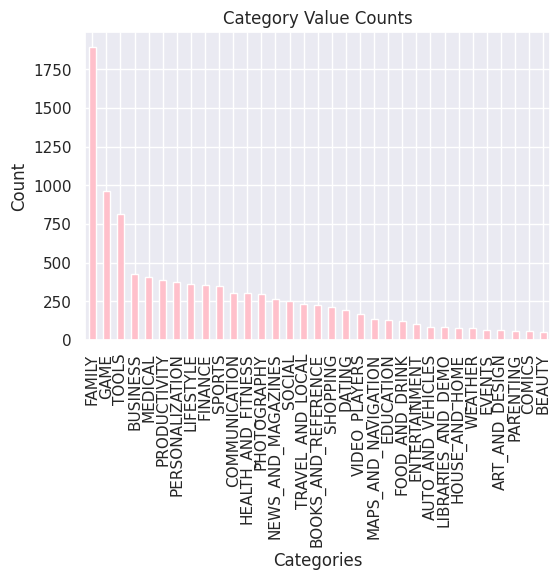

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df["Category"].value_counts().plot(kind='bar',color='pink')
plt.rcParams['figure.figsize'] = (20,5)
plt.title('Category Value Counts')
plt.ylabel('Count')
plt.xlabel('Categories')

##Bivariate Analysis

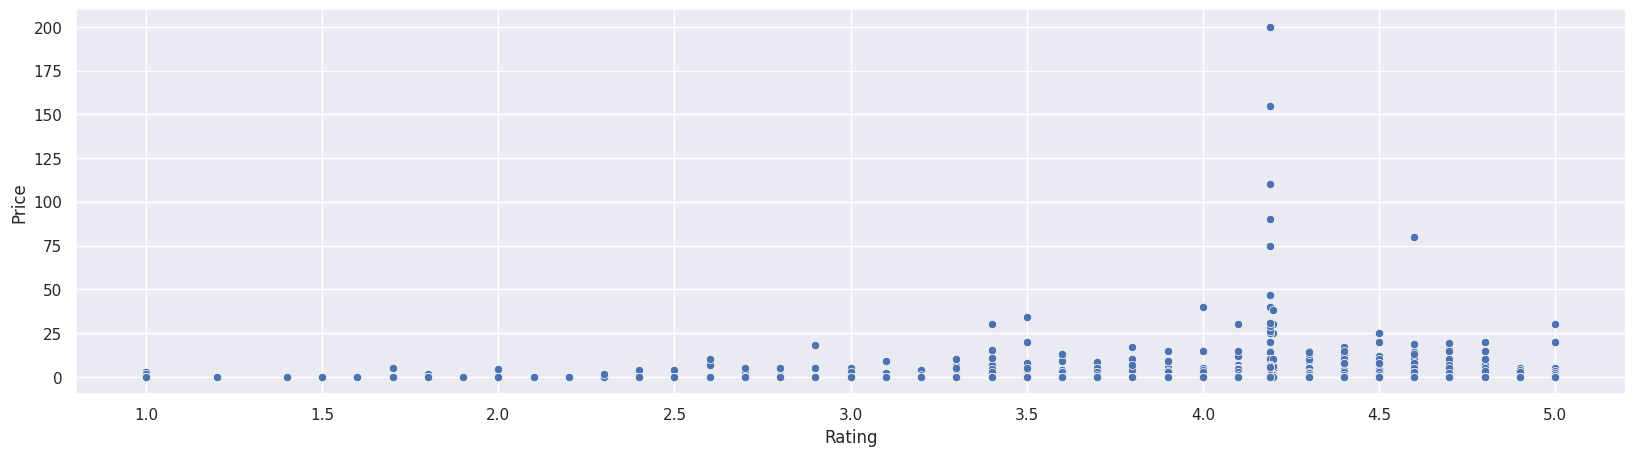

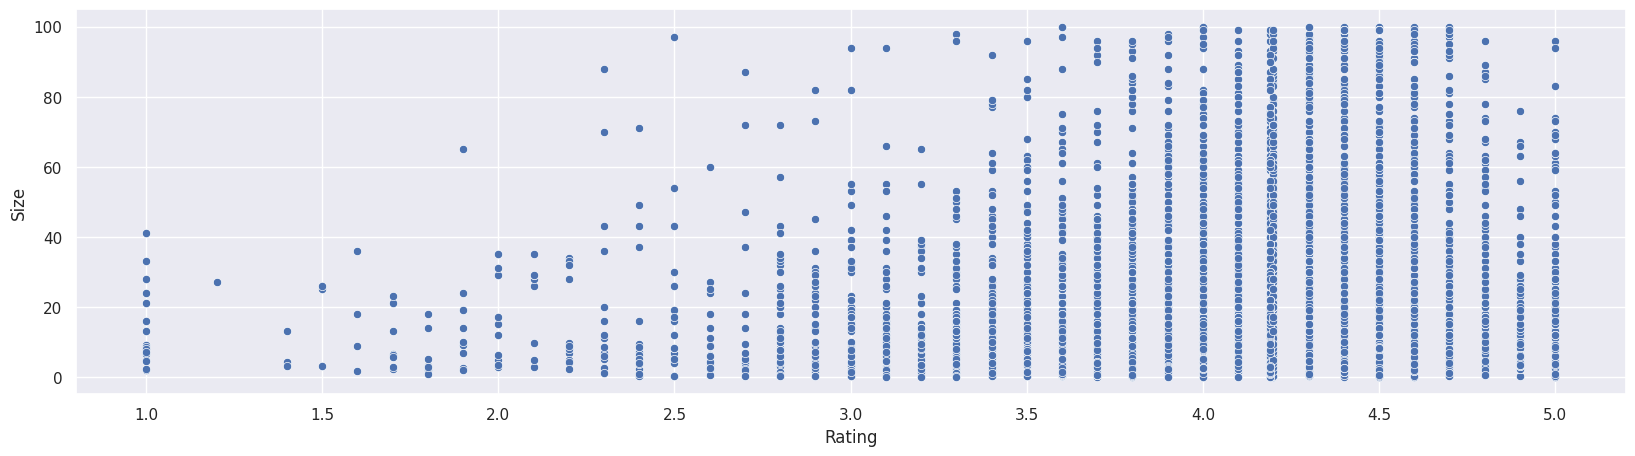

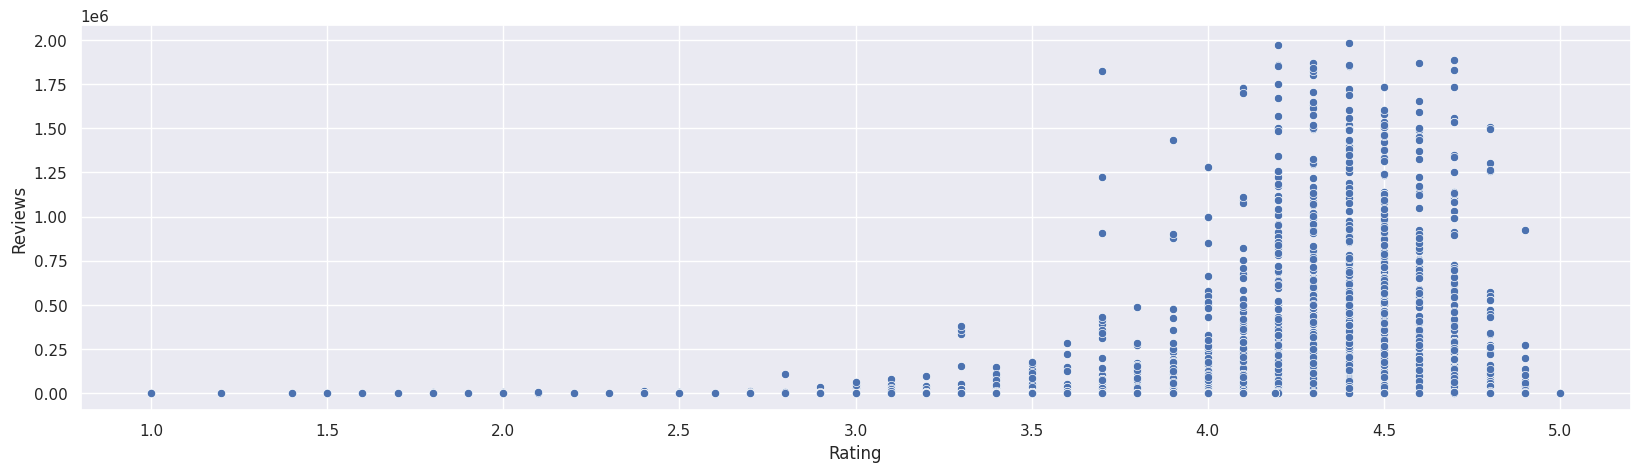

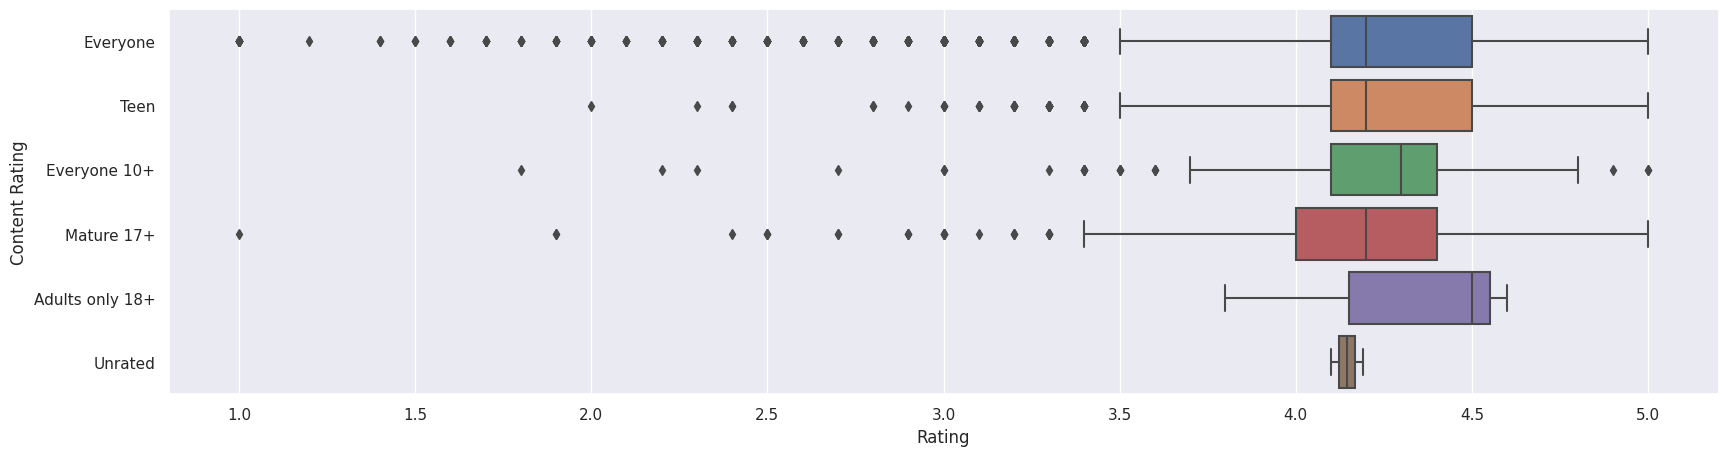

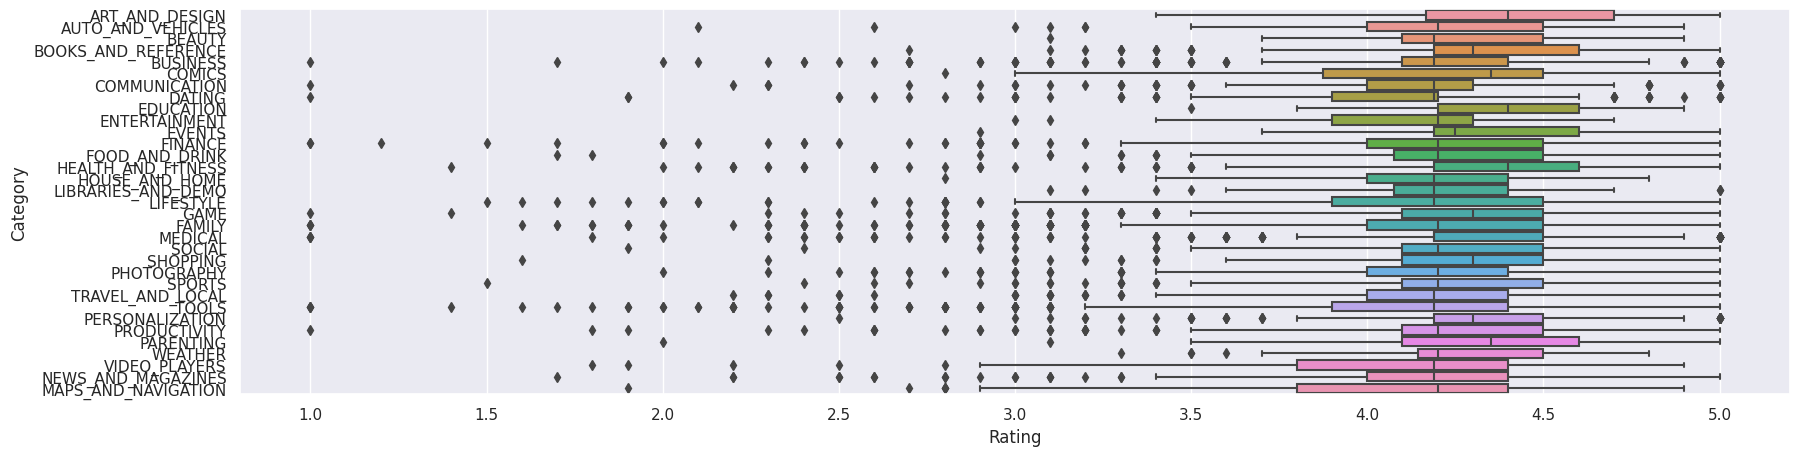

In [ ]:
cols = ['Price','Size','Reviews','Content Rating','Category']

for i in cols:
  if i=='Price' or i=='Size' or i=='Reviews':
    sns.scatterplot(x='Rating', y=i, data=df)
    plt.show()
  else:
    sns.boxplot(x='Rating', y=i, data=df)
    plt.show()

Rating VS Price: Paid apps are higher rated than free apps. \
Rating VS Size: Heavy are apps are rated better. \
Rating VS Reviews: More reviews make app rating better. \
Rating VS Content Rating: Apps which are for everyone has more bad ratings compare to other sections as it has so much outliers value, while 18+ apps have better ratings. \
Rating VS Category: Events category has best ratings compare to others.

##Skewness Check

In [ ]:
df.skew()

<ipython-input-136-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Rating      -1.927226
Reviews      4.247061
Size         1.628068
Installs    21.525621
Price       32.194977
dtype: float64

Reviews, Installs and Price columns are highly skewed. We need to apply transformations in order to deal with the skewness.

In [137]:
col = ['Reviews','Installs','Price']
for i in col:
  df[i] = np.log1p(df[i])

In [138]:
df.skew()

<ipython-input-138-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Rating     -1.927226
Reviews    -0.072705
Size        1.628068
Installs   -0.341504
Price       4.684019
dtype: float64